In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

### Parameters

In [2]:
# model parameters
l = 1.4                     
wp = 1.0                     # [rad/s]
w = wp
l1 = 9.8
l2 = l1/l

# simulation parameters
tf = 300                    # [s]
t = np.linspace(0, tf, 500000)
tl = 60

# steady state solution - dynamic equilibrium state
x_eq = np.array([0, 0, 0, 0])  

# initial conditions 1
t1_0 = 0.25                 # initial value of ϴ1
t2_0 = 0.2                  # initial value of ϴ2
dw1_0 = 0.0                 # initial value of ω1
dw2_0 = 0.0                 # initial value of ω2

x0_N = np.array([t1_0, t2_0, dw1_0, dw2_0])
x0_L = x0_N

# initial conditions 2
t1_1 = (np.pi/4)            # initial value of ϴ1
t2_1 = (np.pi/4)            # initial value of ϴ2
dw1_1 = 0.0                 # initial value of ω1
dw2_1 = 1.0                 # initial value of ω2

x0_N2 = np.array([t1_1, t2_1, dw1_1, dw2_1])

In [3]:
x_eq

array([0, 0, 0, 0])

### Nonlinear model in state space form

In [4]:
# non-linear model in state space form
def N_doub_pend(t, x):
    return [x[2], 
          x[3], 
          (12*np.sin(x[1]-x[0])*x[3]**2+9*l*np.sin(2*x[1]-2*x[0])*x[2]**2+18*l*wp*np.cos(x[1]-x[0])*np.sin(x[1])-12*l*wp*(l+2)*np.sin(x[0]))/(
          l*(8*l+15-9*np.cos(2*x[1]-2*x[0]))), 
          (-9*np.sin(2*x[1]-2*x[0])*x[3]**2-12*l*(l+3)*np.sin(x[1]-x[0])*x[2]**2-6*l*wp*(2*(l+3)*np.sin(x[1])-3*(l+2)*np.cos(x[1]-x[0])*np.sin(x[0])))/(
          8*l+15-9*np.cos(2*x[1]-2*x[0]))]

In [5]:
# testing for the dynamic equilibrium state
N_doub_pend(0, x_eq)

[0, 0, 0.0, -0.0]

### Linearized model in state space form

In [6]:
# state matrix
A = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [(-6*w*(l+2))/(4*l+3), (9*w)/(4*l+3), 0, 0],
    [(9*l*w*(l+2))/(4*l+3), (-6*l*w*(l+3))/(4*l+3), 0, 0],
    ])

# linear model in state space form
def L_doub_pend(t, x):
    return np.matmul(A, x)

### Numerical Simulations

Nonlinear model

In [7]:
# solving the state space non-linear ODEs using solve_ivp function
s_N = solve_ivp(N_doub_pend, [0, tf], x0_N, method='DOP853', dense_output=True)
x_N = s_N.sol(t)
s_N1 = solve_ivp(N_doub_pend, [0, tf], x0_N, method='RK45', dense_output=True)
x_N1 = s_N1.sol(t)

Linearized model

In [30]:
# solving the state space linearized model
s_L = solve_ivp(L_doub_pend, [0, tf], x0_L, method='DOP853', dense_output=True)
x_L = s_L.sol(t)
s_L1 = solve_ivp(L_doub_pend, [0, tf], x0_L, method='RK45', dense_output=True)
x_L1 = s_L1.sol(t)

Yy = x_L1-x_L
Xx = x_N1-x_N
Hh = x_N-x_L

Y = [abs(y) for y in Yy]
X = [abs(x) for x in Xx]
H = [abs(h) for h in Hh]

Condition C2

In [9]:
# solving the state space non-linear ODEs using solve_ivp function
s2_N = solve_ivp(N_doub_pend, [0, tf], x0_N2, method='DOP853', dense_output=True)
x2_N = s2_N.sol(t)
s2_N1 = solve_ivp(N_doub_pend, [0, tf], x0_N2, method='RK45', dense_output=True)
x2_N1 = s2_N1.sol(t)

Z = x2_N1 - x2_N

Plots

# Passo constante - M1

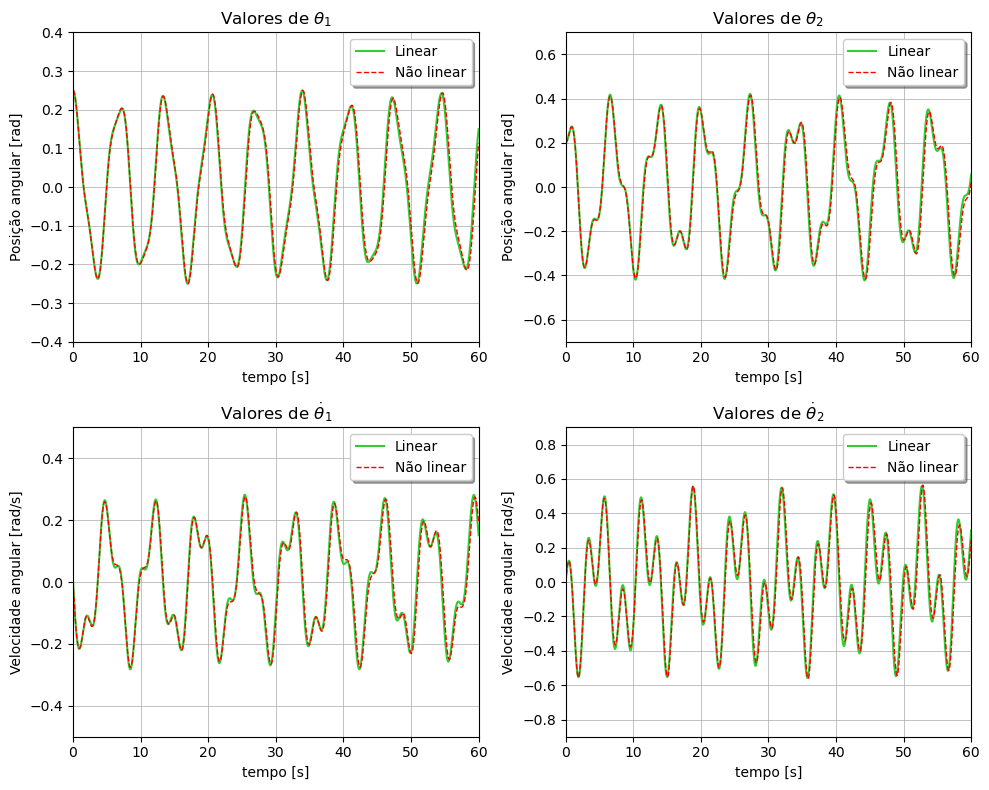

In [49]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axs[0,0].plot(t, x_L1[0], 'limegreen', lw=1.5)
axs[0,0].plot(t, x_N1[0], 'r--', lw=1)
axs[0,0].set_xlabel(r'tempo [s]')
axs[0,0].set_ylabel(r'Posição angular [rad]')
axs[0,0].legend(['Linear', 'Não linear'], shadow=True)
axs[0,0].set_ylim(-0.4,0.4)
axs[0,0].set_xlim(0,tl)
axs[0,0].grid(color='darkgrey', lw=0.5)
axs[0,0].set_title(r'Valores de $\theta_1$', fontfamily = 'sans-serif', fontsize = 'large')

axs[0,1].plot(t, x_L1[1], 'limegreen', lw=1.5)
axs[0,1].plot(t, x_N1[1], 'r--', lw=1)
axs[0,1].set_xlabel(r'tempo [s]')
axs[0,1].set_ylabel(r'Posição angular [rad]')
axs[0,1].legend(['Linear', 'Não linear'], shadow=True)
axs[0,1].set_ylim(-0.7,0.7)
axs[0,1].set_xlim(0,tl)
axs[0,1].grid(color='darkgrey', lw=0.5)
axs[0,1].set_title(r'Valores de $\theta_2$', fontfamily = 'sans-serif', fontsize = 'large')

axs[1,0].plot(t, x_L1[2], 'limegreen', lw=1.5)
axs[1,0].plot(t, x_N1[2], 'r--', lw=1)
axs[1,0].set_xlabel(r'tempo [s]')
axs[1,0].set_ylabel(r'Velocidade angular [rad/s]')
axs[1,0].legend(['Linear', 'Não linear'], shadow=True)
axs[1,0].set_ylim(-0.5,0.5)
axs[1,0].set_xlim(0,tl)
axs[1,0].grid(color='darkgrey', lw=0.5)
axs[1,0].set_title(r'Valores de $\dot{\theta}_{1}$', fontfamily = 'sans-serif', fontsize = 'large')

axs[1,1].plot(t, x_L1[3], 'limegreen', lw=1.5)
axs[1,1].plot(t, x_N1[3], 'r--', lw=1)
axs[1,1].set_xlabel(r'tempo [s]')
axs[1,1].set_ylabel(r'Velocidade angular [rad/s]')
axs[1,1].legend(['Linear', 'Não linear'], shadow=True)
axs[1,1].set_ylim(-0.9,0.9)
axs[1,1].set_xlim(0,tl)
axs[1,1].grid(color='darkgrey', lw=0.5)
axs[1,1].set_title(r'Valores de $\dot{\theta}_{2}$', fontfamily = 'sans-serif', fontsize = 'large')


# Adjust the layout and spacing
fig.tight_layout()

plt.savefig('theta_M2_C1.png', format='png')

# Show the plot
plt.show()

# Passo variável - M2

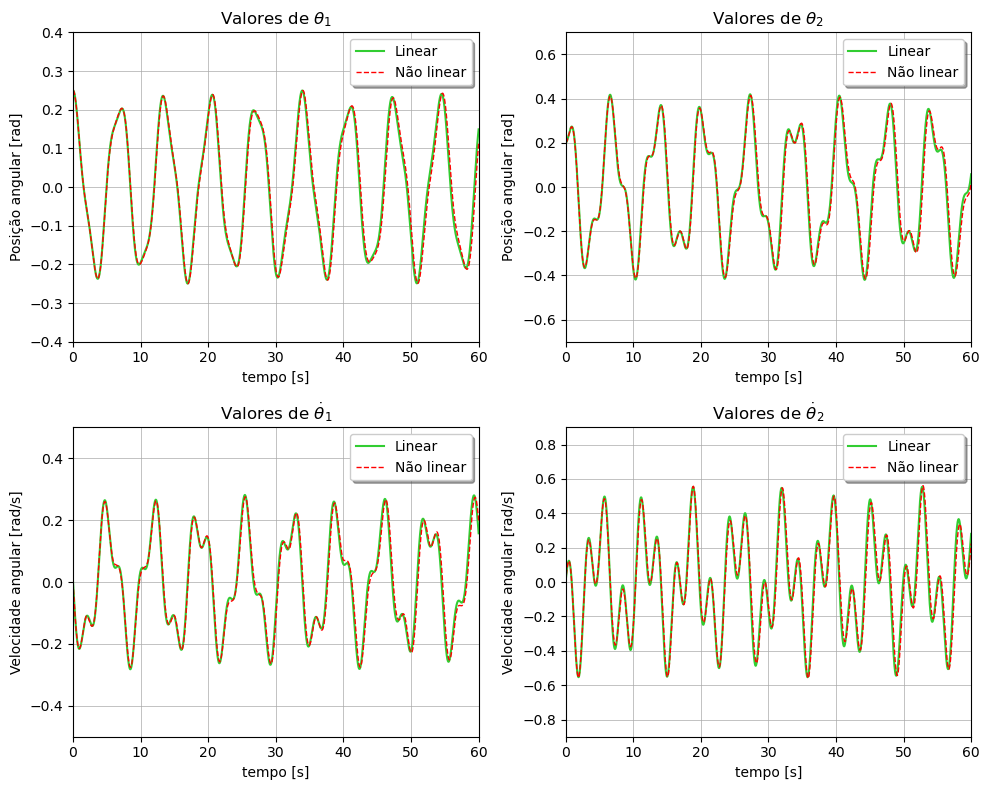

In [48]:
# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axs[0,0].plot(t, x_L[0], 'limegreen', lw=1.5)
axs[0,0].plot(t, x_N[0], 'r--', lw=1)
axs[0,0].set_xlabel(r'tempo [s]')
axs[0,0].set_ylabel(r'Posição angular [rad]')
axs[0,0].legend(['Linear', 'Não linear'], shadow=True)
axs[0,0].set_ylim(-0.4,0.4)
axs[0,0].set_xlim(0,tl)
axs[0,0].grid(color='darkgrey', lw=0.5)
axs[0,0].set_title(r'Valores de $\theta_1$', fontfamily = 'sans-serif', fontsize = 'large')

axs[0,1].plot(t, x_L[1], 'limegreen', lw=1.5)
axs[0,1].plot(t, x_N[1], 'r--', lw=1)
axs[0,1].set_xlabel(r'tempo [s]')
axs[0,1].set_ylabel(r'Posição angular [rad]')
axs[0,1].legend(['Linear', 'Não linear'], shadow=True)
axs[0,1].set_ylim(-0.7,0.7)
axs[0,1].set_xlim(0,tl)
axs[0,1].grid(color='darkgrey', lw=0.5)
axs[0,1].set_title(r'Valores de ${\theta}_{2}$', fontfamily = 'sans-serif', fontsize = 'large')

axs[1,0].plot(t, x_L[2], 'limegreen', lw=1.5)
axs[1,0].plot(t, x_N[2], 'r--', lw=1)
axs[1,0].set_xlabel(r'tempo [s]')
axs[1,0].set_ylabel(r'Velocidade angular [rad/s]')
axs[1,0].legend(['Linear', 'Não linear'], shadow=True)
axs[1,0].set_ylim(-0.5,0.5)
axs[1,0].set_xlim(0,tl)
axs[1,0].grid(color='darkgrey', lw=0.5)
axs[1,0].set_title(r'Valores de $\dot{\theta}_{1}$', fontfamily = 'sans-serif', fontsize = 'large')

axs[1,1].plot(t, x_L[3], 'limegreen', lw=1.5)
axs[1,1].plot(t, x_N[3], 'r--', lw=1)
axs[1,1].set_xlabel(r'tempo [s]')
axs[1,1].set_ylabel(r'Velocidade angular [rad/s]')
axs[1,1].legend(['Linear', 'Não linear'], shadow=True)
axs[1,1].set_ylim(-0.9,0.9)
axs[1,1].set_xlim(0,tl)
axs[1,1].grid(color='darkgrey', lw=0.5)
axs[1,1].set_title(r'Valores de $\dot{\theta}_{2}$', fontfamily = 'sans-serif', fontsize = 'large')


# Adjust the layout and spacing
fig.tight_layout()

plt.savefig('theta_M1_C1.png', format='png')

# Show the plot
plt.show()

# Diferença entre M1 e M2

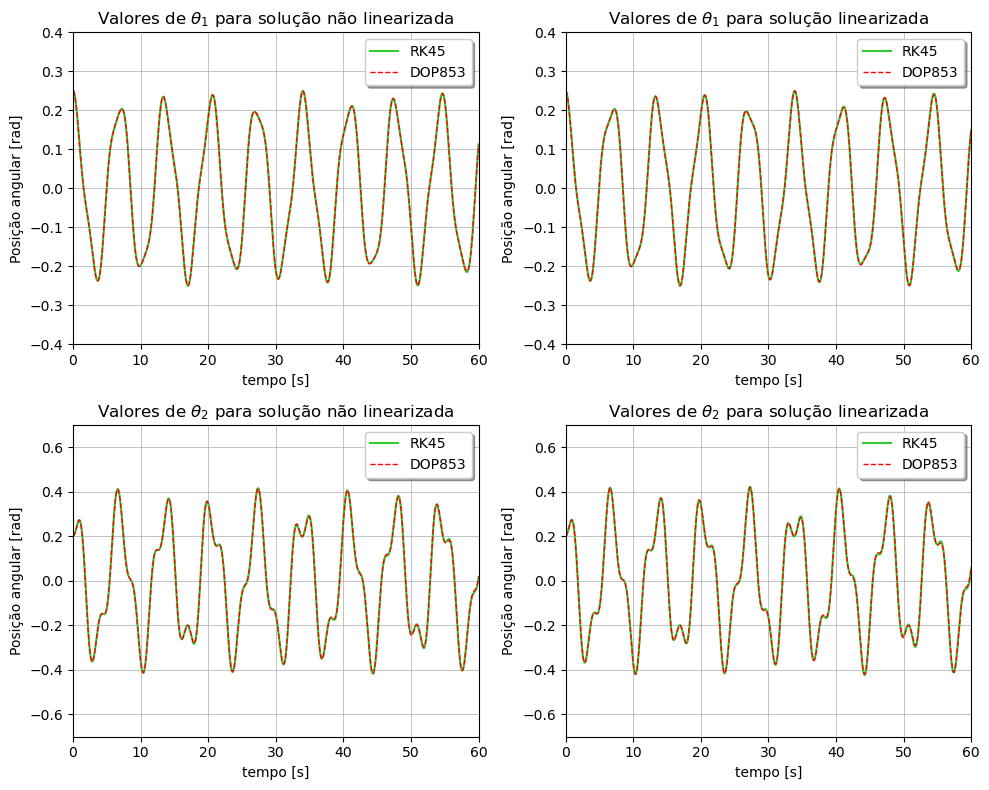

In [50]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axs[0,0].plot(t, x_N1[0], 'limegreen', lw=1.5)
axs[0,0].plot(t, x_N[0], 'r--', lw=1)
axs[0,0].set_xlabel(r'tempo [s]')
axs[0,0].set_ylabel(r'Posição angular [rad]')
axs[0,0].legend(['RK45', 'DOP853'], shadow=True)
axs[0,0].set_xlim(0,tl)
axs[0,0].set_ylim(-0.4,0.4)
axs[0,0].grid(color='darkgrey', lw=0.5)
axs[0,0].set_title(r'Valores de $\theta_1$ para solução não linearizada', fontfamily = 'sans-serif', fontsize = 'large')

axs[0,1].plot(t, x_L1[0], 'limegreen', lw=1.5)
axs[0,1].plot(t, x_L[0], 'r--', lw=1)
axs[0,1].set_xlabel(r'tempo [s]')
axs[0,1].set_ylabel(r'Posição angular [rad]')
axs[0,1].legend(['RK45', 'DOP853'], shadow=True)
axs[0,1].set_xlim(0,tl)
axs[0,1].set_ylim(-0.4,0.4)
axs[0,1].grid(color='darkgrey', lw=0.5)
axs[0,1].set_title(r'Valores de $\theta_1$ para solução linearizada', fontfamily = 'sans-serif', fontsize = 'large')

axs[1,0].plot(t, x_N1[1], 'limegreen', lw=1.5)
axs[1,0].plot(t, x_N[1], 'r--', lw=1)
axs[1,0].set_xlabel(r'tempo [s]')
axs[1,0].set_ylabel(r'Posição angular [rad]')
axs[1,0].legend(['RK45', 'DOP853'], shadow=True)
axs[1,0].set_xlim(0,tl)
axs[1,0].set_ylim(-0.7,0.7)
axs[1,0].grid(color='darkgrey', lw=0.5)
axs[1,0].set_title(r'Valores de $\theta_2$ para solução não linearizada', fontfamily = 'sans-serif', fontsize = 'large')

axs[1,1].plot(t, x_L1[1], 'limegreen', lw=1.5)
axs[1,1].plot(t, x_L[1], 'r--', lw=1)
axs[1,1].set_xlabel(r'tempo [s]')
axs[1,1].set_ylabel(r'Posição angular [rad]')
axs[1,1].legend(['RK45', 'DOP853'], shadow=True)
axs[1,1].set_xlim(0,tl)
axs[1,1].set_ylim(-0.7,0.7)
axs[1,1].grid(color='darkgrey', lw=0.5)
axs[1,1].set_title(r'Valores de $\theta_2$ para solução linearizada', fontfamily = 'sans-serif', fontsize = 'large')


# Adjust the layout and spacing
fig.tight_layout()

plt.savefig('theta_M1xM2_C1.png', format='png')

# Show the plot
plt.show()

# Condição C2

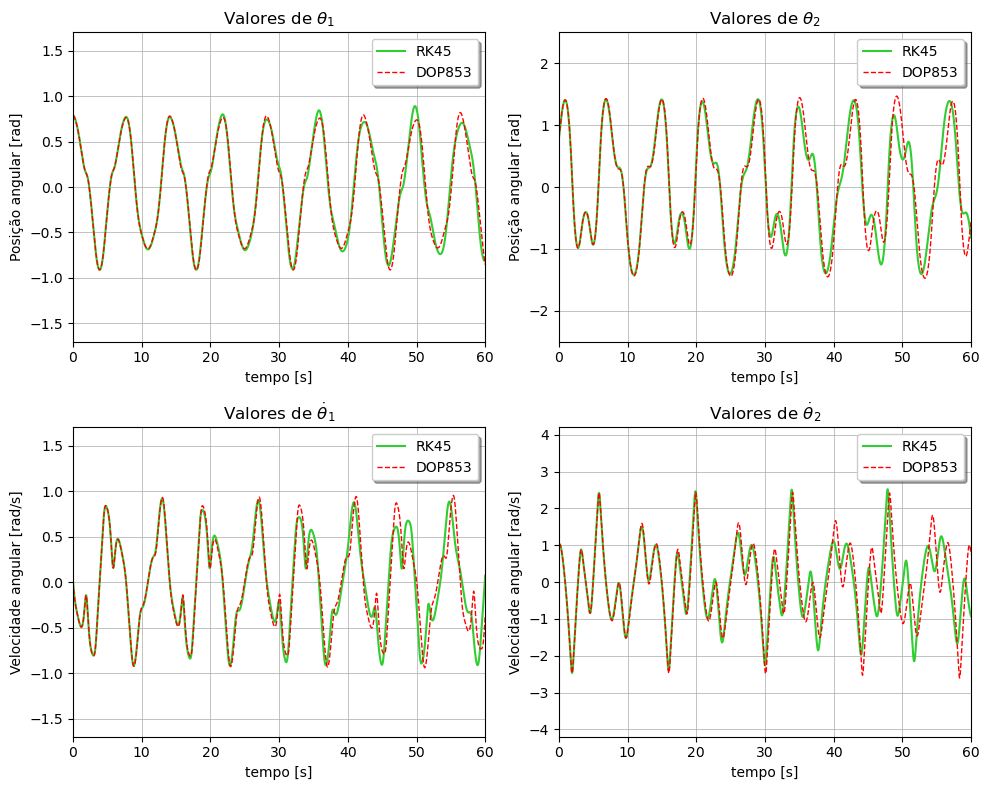

In [59]:
# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axs[0,0].plot(t, x2_N1[0], 'limegreen', lw=1.5)
axs[0,0].plot(t, x2_N[0], 'r--', lw=1)
axs[0,0].set_xlabel(r'tempo [s]')
axs[0,0].set_ylabel(r'Posição angular [rad]')
axs[0,0].legend(['RK45', 'DOP853'], shadow=True)
axs[0,0].set_ylim(-1.7,1.7)
axs[0,0].set_xlim(0,tl)
axs[0,0].grid(color='darkgrey', lw=0.5)
axs[0,0].set_title(r'Valores de $\theta_1$', fontfamily = 'sans-serif', fontsize = 'large')

axs[0,1].plot(t, x2_N1[1], 'limegreen', lw=1.5)
axs[0,1].plot(t, x2_N[1], 'r--', lw=1)
axs[0,1].set_xlabel(r'tempo [s]')
axs[0,1].set_ylabel(r'Posição angular [rad]')
axs[0,1].legend(['RK45', 'DOP853'], shadow=True)
axs[0,1].set_ylim(-2.5,2.5)
axs[0,1].set_xlim(0,tl)
axs[0,1].grid(color='darkgrey', lw=0.5)
axs[0,1].set_title(r'Valores de $\theta_2$', fontfamily = 'sans-serif', fontsize = 'large')

axs[1,0].plot(t, x2_N1[2], 'limegreen', lw=1.5)
axs[1,0].plot(t, x2_N[2], 'r--', lw=1)
axs[1,0].set_xlabel(r'tempo [s]')
axs[1,0].set_ylabel(r'Velocidade angular [rad/s]')
axs[1,0].legend(['RK45', 'DOP853'], shadow=True)
axs[1,0].set_ylim(-1.7,1.7)
axs[1,0].set_xlim(0,tl)
axs[1,0].grid(color='darkgrey', lw=0.5)
axs[1,0].set_title(r'Valores de $\dot{\theta}_{1}$', fontfamily = 'sans-serif', fontsize = 'large')

axs[1,1].plot(t, x2_N1[3], 'limegreen', lw=1.5)
axs[1,1].plot(t, x2_N[3], 'r--', lw=1)
axs[1,1].set_xlabel(r'tempo [s]')
axs[1,1].set_ylabel(r'Velocidade angular [rad/s]')
axs[1,1].legend(['RK45', 'DOP853'], shadow=True)
axs[1,1].set_ylim(-4.2,4.2)
axs[1,1].set_xlim(0,tl)
axs[1,1].grid(color='darkgrey', lw=0.5)
axs[1,1].set_title(r'Valores de $\dot{\theta}_{2}$', fontfamily = 'sans-serif', fontsize = 'large')

# Adjust the layout and spacing
fig.tight_layout()

plt.savefig('theta_C2.png', format='png')

# Show the plot
plt.show()

# Energia Mecânica

In [14]:
def E(x):
    e = ((l1**3)*(x[2]**2)/6)+((l1**2)*l2*(x[2]**2)/2)+((l2**3)*(x[3]**2)/6)+(0.5*l1*(l2**2)*x[2]*x[3]*np.cos(x[1]-x[0])) + 4.9*((l1**2)*(1-np.cos(x[0]))+2*l1*l2*(1-np.cos(x[0]))+(l2**2)*(1-np.cos(x[1])))
    return e

E0 = E(x0_N)
ΔE_N = np.array([E(x) for x in x_N.T])
ΔE_N1 = np.array([E(x) for x in x_N1.T])
ΔE_L = np.array([E(x) for x in x_L.T])

E1 = E(x0_N2)
ΔE1_N = np.array([E(x) for x in x2_N.T])
ΔE1_N1 = np.array([E(x) for x in x2_N1.T])

J = ΔE_N - ΔE_L

In [60]:
E1

462.23095884841996

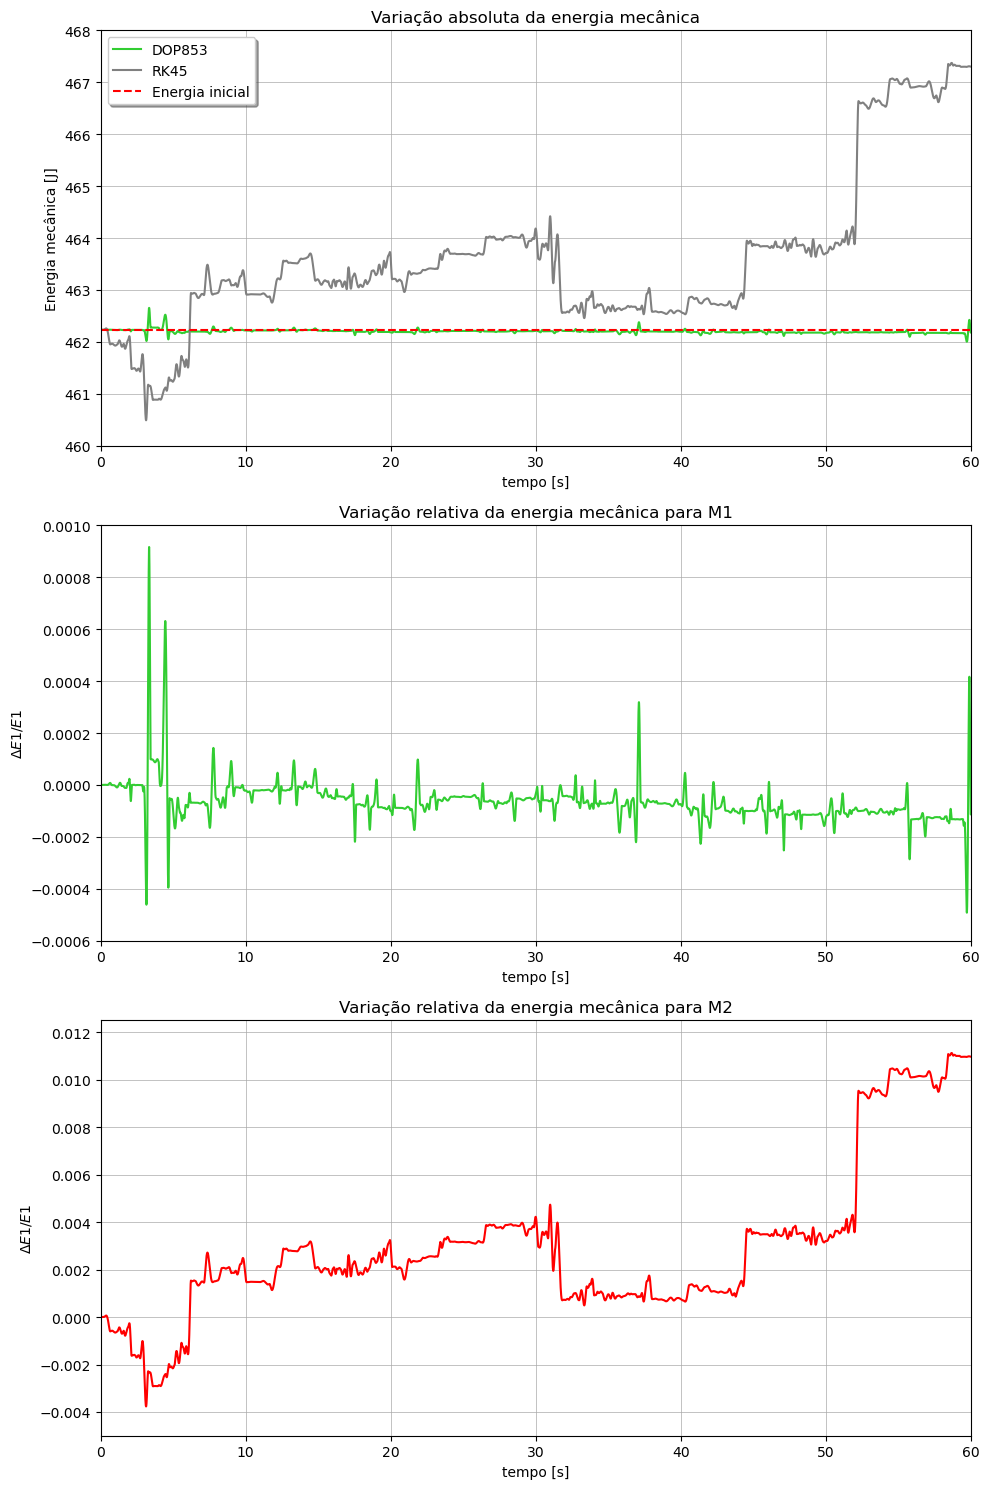

In [75]:
# Create a figure with subplots
fig, axs_e1 = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

axs_e1[0].plot(t, (ΔE1_N), color='limegreen', lw=1.5)
axs_e1[0].plot(t, (ΔE1_N1), color='grey', lw=1.5)
axs_e1[0].axhline(y = E1, color = 'r', linestyle = '--')
axs_e1[0].set_xlabel(r'tempo [s]')
axs_e1[0].set_ylabel(r'Energia mecânica [J]')
axs_e1[0].set_xlim(0,tl)
axs_e1[0].set_ylim(460,468)
axs_e1[0].legend(['DOP853', 'RK45', 'Energia inicial'], shadow=True)
axs_e1[0].grid(color='darkgrey', lw=0.5)
axs_e1[0].set_title(r'Variação absoluta da energia mecânica', fontfamily = 'sans-serif', fontsize = 'large')

axs_e1[1].plot(t, (ΔE1_N-E1)/E1, color='limegreen', lw=1.5)
axs_e1[1].set_xlabel(r'tempo [s]')
axs_e1[1].set_ylabel(r'$ΔE1/E1$')
axs_e1[1].set_xlim(0,tl)
axs_e1[1].set_ylim(-0.0006,0.001)
axs_e1[1].grid(color='darkgrey', lw=0.5)
axs_e1[1].set_title(r'Variação relativa da energia mecânica para M1', fontfamily = 'sans-serif', fontsize = 'large')

axs_e1[2].plot(t, (ΔE1_N1-E1)/E1, color='r', lw=1.5)
axs_e1[2].set_xlabel(r'tempo [s]')
axs_e1[2].set_ylabel(r'$ΔE1/E1$')
axs_e1[2].set_xlim(0,tl)
axs_e1[2].set_ylim(-0.005,0.0125)
axs_e1[2].grid(color='darkgrey', lw=0.5)
axs_e1[2].set_title(r'Variação relativa da energia mecânica para M2', fontfamily = 'sans-serif', fontsize = 'large')

# Adjust the layout and spacing
fig.tight_layout()

plt.savefig('energia_C2.png', format='png')

# Show the plot
plt.show()